**Importing Libraries and Dataset**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv("AB_NYC_2019.csv")  # reading the data

In [38]:
df.shape

(48901, 16)

In [39]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [40]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.890100e+04,4.890100e+04,48901.000000,48901.000000,48901.000000,48901.000000,48901.000000,38848.000000,48901.000000,48901.000000
mean,1.901481e+07,6.761171e+07,40.728950,-73.952171,152.720210,7.029488,23.279933,1.373197,7.143351,112.796282
std,1.098445e+07,7.860971e+07,0.054531,0.046154,240.140152,20.509366,44.562735,1.680451,32.950553,131.630175
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.469827e+06,7.810471e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967610e+07,3.078984e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915163e+07,1.074344e+08,40.763120,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48901 entries, 0 to 48900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48901 non-null  int64  
 1   name                            48885 non-null  object 
 2   host_id                         48901 non-null  int64  
 3   host_name                       48880 non-null  object 
 4   neighbourhood_group             48901 non-null  object 
 5   neighbourhood                   48901 non-null  object 
 6   latitude                        48901 non-null  float64
 7   longitude                       48901 non-null  float64
 8   room_type                       48901 non-null  object 
 9   price                           48901 non-null  int64  
 10  minimum_nights                  48901 non-null  int64  
 11  number_of_reviews               48901 non-null  int64  
 12  last_review                     

In [42]:
# trying to analyze the data
df[df['host_name'] == 'Jennifer']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
48,13050,bright and stylish duplex,50846,Jennifer,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,Entire home/apt,115,3,11,1/1/2017,0.10,1,0
306,71248,Bright and lovely 1 bdrm apt in LES,363834,Jennifer,Manhattan,Chinatown,40.71659,-73.98945,Entire home/apt,125,25,43,6/17/2019,0.42,1,102
326,80493,Cozy room in East Village with AC,434987,Jennifer,Manhattan,East Village,40.72329,-73.98486,Private room,71,2,182,7/4/2019,1.81,1,200
497,176135,Cosy Sunny 1brm in Prospect Heights,842125,Jennifer,Brooklyn,Crown Heights,40.67505,-73.95969,Entire home/apt,97,3,31,10/23/2018,0.32,1,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48110,36083269,"Serene Storefront Studio, a private cozy hideaway",3358348,Jennifer,Brooklyn,Crown Heights,40.67497,-73.94973,Entire home/apt,97,1,0,NaN,NaN,1,63
48164,36113257,WaHi Walk Up,22528598,Jennifer,Manhattan,Washington Heights,40.85269,-73.93616,Private room,80,1,1,6/29/2019,1.00,1,68
48511,36304817,HugeHipHome 5BR 2 Bath w/ Yard 15 min to Midtown!,143725634,Jennifer,Queens,Long Island City,40.76001,-73.93031,Entire home/apt,450,2,0,NaN,NaN,1,321
48853,36455917,Sunny&quiet paradise in the WV with open views,274103383,Jennifer,Manhattan,West Village,40.73444,-74.00335,Private room,202,2,0,NaN,NaN,1,84


In [43]:
df['name'].nunique()  # unique listings

47896

In [44]:
df['neighbourhood_group'].nunique()  # unique neighbourhood groups

7

In [45]:
df['host_name'].nunique()  # unique hosts

11452

In [46]:
len(df[df['price'] == 0])  # properties with price = 0

11

In [47]:
df['host_name'].value_counts()[:10]  # hosts with number of listings

host_name
Michael         417
David           403
Sonder (NYC)    327
John            295
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: count, dtype: int64

In [48]:
df_num = df.select_dtypes(include=['number'])
df_num.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588338,-0.003168,0.090940,0.010620,-0.013182,-0.319807,0.291778,0.133280,0.085245
host_id,0.588338,1.000000,0.020200,0.127072,0.015310,-0.017344,-0.140158,0.296395,0.154959,0.203361
latitude,-0.003168,0.020200,1.000000,0.084799,0.033937,0.024875,-0.015475,-0.010190,0.019507,-0.010997
longitude,0.090940,0.127072,0.084799,1.000000,-0.150024,-0.062737,0.059036,0.145949,-0.114708,0.082679
price,0.010620,0.015310,0.033937,-0.150024,1.000000,0.042797,-0.047958,-0.030624,0.057472,0.081831
minimum_nights,-0.013182,-0.017344,0.024875,-0.062737,0.042797,1.000000,-0.080127,-0.121701,0.127962,0.144248
number_of_reviews,-0.319807,-0.140158,-0.015475,0.059036,-0.047958,-0.080127,1.000000,0.549893,-0.072375,0.172013
reviews_per_month,0.291778,0.296395,-0.010190,0.145949,-0.030624,-0.121701,0.549893,1.000000,-0.009422,0.185742
calculated_host_listings_count,0.133280,0.154959,0.019507,-0.114708,0.057472,0.127962,-0.072375,-0.009422,1.000000,0.225660
availability_365,0.085245,0.203361,-0.010997,0.082679,0.081831,0.144248,0.172013,0.185742,0.225660,1.000000


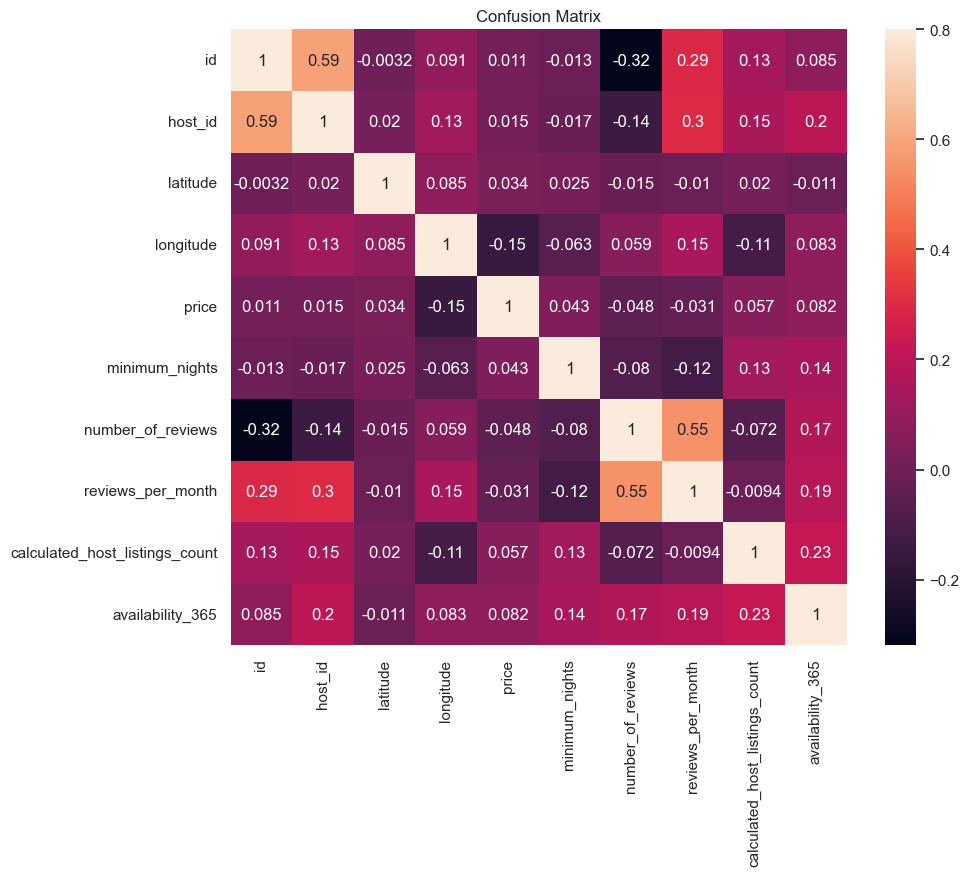

In [49]:
# Correlation matrix before cleaning
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, vmax=.8, square=True);
plt.title('Confusion Matrix')
plt.show()

**2. DATA CLEANING**

**2.1 Handling null values**

In [50]:
df.isna().sum()  # finding number of null values in the data

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10053
reviews_per_month                 10053
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [51]:
df['name'].fillna('Not known', inplace = True)
df['host_name'].fillna('Not known', inplace = True)
df['reviews_per_month'].fillna(0, inplace = True)

Comment: As it is difficult to handle missing values of name and host name without further knowledge on domain (and also as they are free form text), we are replacing them with 'Not Known' label.

In [52]:
df.drop(['last_review'], axis = 1, inplace = True)  # dropping this column as it is not of much use and also has many null values

**2.2 Handling duplicates**

In [53]:
df.drop_duplicates(inplace=True)  # dropping duplicate rows if any

In [54]:
df.shape

(48897, 15)

**2.3 Text Data Cleaning**
- Lowercasing words
- Removing stopwords
- Removing Punctuations
- Removing other characters that are not relevant
- Removing extra spaces

In [55]:
def clean_text_data(sentence, stop_words):
    sentence = sentence.lower()  # converting the text into lower case to standardize the text
    sentence = sentence.split()
    text = ""
    for word in sentence:  # removing stopwords from the sentence
        if word in stop_words:
            continue
        else:
            text = text + word + " "
    text = text.strip()
    punctuations = string.punctuation
    text = ''.join([punc for punc in text if punc not in punctuations])  # removing punctuations from the sentence
     # there are different symbols like ❥, çº½çº¦ä¹‹å®¶ in the data, hence to remove them, we are just considering the text that is in A-Z, a-z or digits
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) 
    text = ' '.join(text.split())
    return text

In [56]:
stop_words = stopwords.words('english')

In [57]:
df['name'] = df['name'].apply(lambda x: clean_text_data(str(x),stop_words))  # cleaning text data in name column
df['host_name'] = df['host_name'].apply(lambda x: str(x).lower())  # lowercasing all names in host_name column
df["room_type"] = df["room_type"].str.lower().str.replace('/',' or ')  # Normalizing text data in room type column (to replace special character '/' with or)
df['neighbourhood_group'] = df['neighbourhood_group'].apply(lambda x: clean_text_data(str(x),stop_words))  # cleaning - lowercasing, punctuations
df['neighbourhood'] = df['neighbourhood'].str.lower()  # lowercasing all neighbourhood data

**2.4 Handling Inappropriate data**

In [58]:
# As price cannot be 0 if you want to rent out a property, if price = 0 for any listing, it is considered as anamoly. Hence remove the rows with price=0
df = df[~(df['price'] == 0)]  # removing listings with 0 price values 

In [59]:
df['price'].value_counts().sort_index(ascending=True).to_frame()  # analyzing min to max prices with their counts in ascending order

,count
price,
10,17
11,3
12,4
13,1
15,6
...,...
7703,1
8000,1
8500,1


**2.5 Handling Outliers**

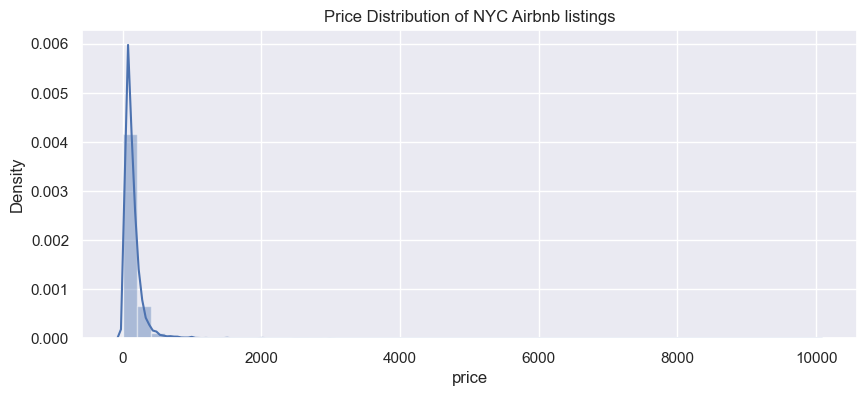

In [60]:
# distribution plot
sns.set(rc={"figure.figsize": (10, 4)})
sns.distplot(df['price'],hist=True)
plt.title('Price Distribution of NYC Airbnb listings')
plt.show()

In [61]:
# skewness
print("Skewness: %f" % df['price'].skew())  # skewness should be near to 0

Skewness: 19.119357


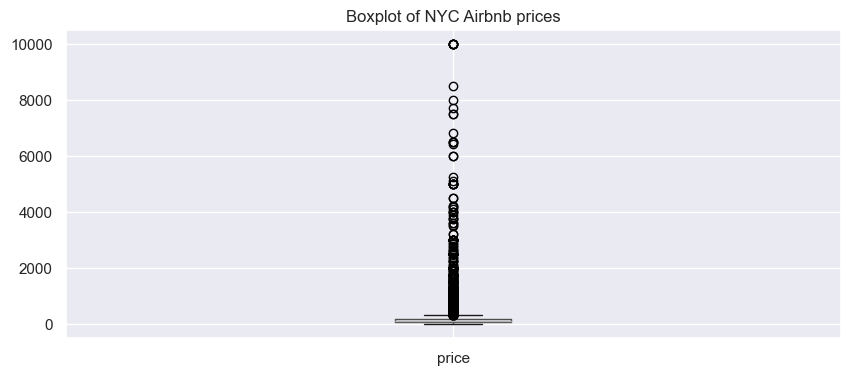

In [62]:
# To see outliers in price
df.boxplot(column=['price'])
plt.title('Boxplot of NYC Airbnb prices')
plt.show()

In [63]:
# Handling Outliers
def remove_outliers_using_iqr(df, col_name):
    count = 0
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    lowerbound = q1 - 1.5 * iqr
    upperbound = q3 + 1.5* iqr
    outliers = (df[col_name] < lowerbound) | (df[col_name] > upperbound)
    df = df[~outliers]
    return df

In [64]:
for col in df.select_dtypes(include=['number']):
    min = df[col].min()
    max = df[col].max()
    print(f'col: {col}, min: {min}, max: {max}')

col: id, min: 2539, max: 36487245
col: host_id, min: 2438, max: 274321313
col: latitude, min: 40.49979, max: 40.91306
col: longitude, min: -74.24442, max: -73.71299
col: price, min: 10, max: 10000
col: minimum_nights, min: 1, max: 1250
col: number_of_reviews, min: 0, max: 629
col: reviews_per_month, min: 0.0, max: 58.5
col: calculated_host_listings_count, min: 1, max: 327
col: availability_365, min: 0, max: 365


In [65]:
numerical_columns = ['price', 'minimum_nights','number_of_reviews', 'availability_365']  # we are removing outliers from all numerical column so that our model should not be 
for col in numerical_columns:
    df = remove_outliers_using_iqr(df, col)

In [66]:
df.shape

(35197, 15)

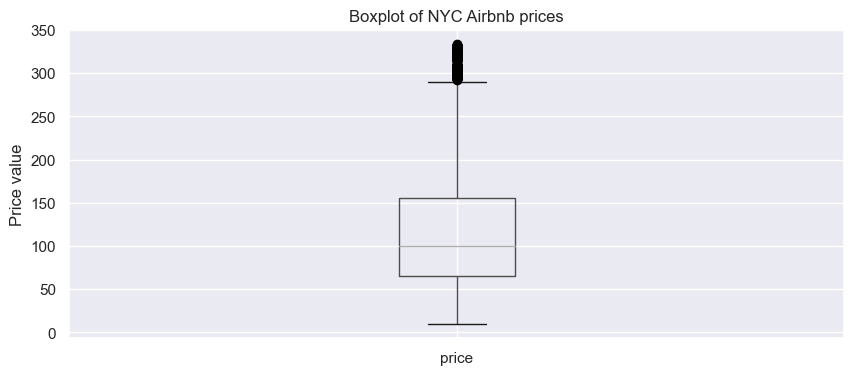

In [69]:
# checking if removing outliers results in better plots than before without outlier data again
df.boxplot(column='price') 
plt.ylabel('Price value')
plt.title('Boxplot of NYC Airbnb prices')
plt.show()

In [70]:
print("Skewness: %f" % df['price'].skew()) 

Skewness: 0.947533


As we can see, skewness decreased than before after removing outliers and is closer to zero and less than 1, which is better.

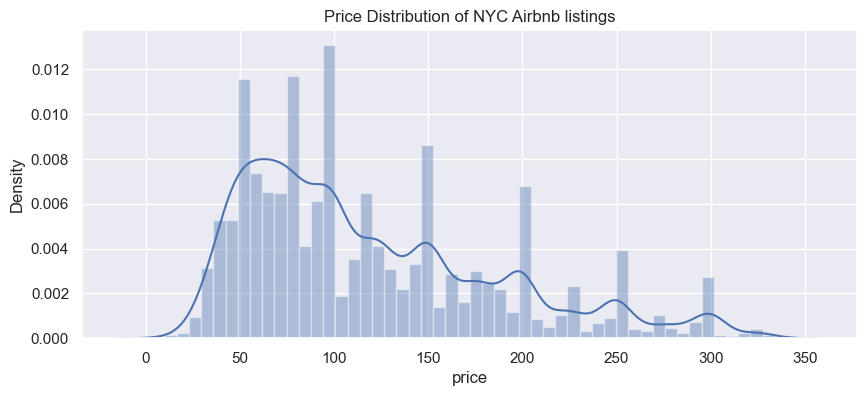

In [72]:
sns.distplot(df['price'])
plt.title('Price Distribution of NYC Airbnb listings')
plt.show()

**2.5 Converting Categorical values into numerical**

In [73]:
labelenc = LabelEncoder()  # using label encoder to transform categorical to numerical values

In [74]:
df['neighbourhood_group'] = labelenc.fit_transform(df['neighbourhood_group'])

In [75]:
# Mapping between categories and numerical labels (saving these values for our future refernce)
neighbourhood_group_mapping = dict(zip(labelenc.classes_, labelenc.transform(labelenc.classes_)))
print(neighbourhood_group_mapping)

{'bronx': 0, 'brooklyn': 1, 'manhattan': 2, 'queens': 3, 'staten island': 4}


In [76]:
df['room_type'] = labelenc.fit_transform(df['room_type'])

In [77]:
df['host_name'].nunique()

9492

In [78]:
# Mapping between categories and numerical labels (saving these values for our future refernce)
room_type_mapping = dict(zip(labelenc.classes_, labelenc.transform(labelenc.classes_)))
print(room_type_mapping)

{'entire home or apt': 0, 'private room': 1, 'shared room': 2}


In [80]:
# Mapping nieghbourhood groups with their neighbourhood values for futher analysis
neighborhood_mapping = {}
for group, group_df in df.groupby('neighbourhood_group'):
    unique_neighborhoods = group_df['neighbourhood'].unique().tolist()
    neighborhood_mapping[group] = unique_neighborhoods

**2.6 Normalizing data**

In [81]:
# normalize numerical columns

numerical_columns = ['reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews','minimum_nights','calculated_host_listings_count', 'availability_365']
for col in numerical_columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean quiet apt home park,2787,john,1,kensington,40.64749,-73.97237,1,149,0.0,0.126761,0.010029,0.015337,1.000000
1,2595,skylit midtown castle,2845,jennifer,2,midtown,40.75362,-73.98377,0,225,0.0,0.633803,0.018147,0.003067,0.972603
2,3647,village harlemnew york,4632,elisabeth,2,harlem,40.80902,-73.94190,1,150,0.2,0.000000,0.000000,0.000000,1.000000
4,5022,entire apt spacious studioloft central park,7192,laura,2,east harlem,40.79851,-73.94399,0,80,0.9,0.126761,0.004776,0.000000,0.000000
10,5295,beautiful 1br upper west side,7702,lena,2,upper west side,40.80316,-73.96545,0,135,0.4,0.746479,0.020535,0.000000,0.016438
18,7726,hip historic brownstone apartment backyard,20950,adam and charity,1,crown heights,40.67592,-73.94694,0,99,0.2,0.746479,0.212034,0.000000,0.057534
19,7750,huge 2 br upper east cental park,17985,sing,2,east harlem,40.79685,-73.94872,0,190,0.6,0.000000,0.000000,0.003067,0.682192
20,7801,sweet spacious brooklyn loft,21207,chaya,1,williamsburg,40.71842,-73.95718,0,299,0.2,0.126761,0.003343,0.000000,0.000000
22,8025,cbg helps haiti room25,22486,lisel,1,park slope,40.67989,-73.97798,1,80,0.0,0.549296,0.017670,0.015337,0.997260
23,8110,cbg helps haiti rm 2,22486,lisel,1,park slope,40.68001,-73.97865,1,110,0.1,1.000000,0.029131,0.015337,0.832877


**EDA**

In [82]:
# Analysing data by neighbourhood group
df['neighbourhood_group'].value_counts().to_frame()

,count
neighbourhood_group,
1,15326
2,14293
3,4392
0,893
4,293


In [83]:
# Analysing data by room type
df['room_type'].value_counts().to_frame()

,count
room_type,
1,17676
0,16598
2,923


Comment: We can see that Brooklyn has the highest number of listings and then we have Manhattan on second.

In [84]:
df.groupby(['neighbourhood_group','neighbourhood'])['neighbourhood_group'].count().to_frame()

neighbourhood_group
neighbourhood_group neighbourhood                     
0                   allerton                        32
                    baychester                       6
                    belmont                         23
                    bronxdale                       17
                    castle hill                      8
...                                                ...
4                   tompkinsville                   32
                    tottenville                      7
                    west brighton                   14
                    westerleigh                      2
                    willowbrook                      1

[217 rows x 1 columns]

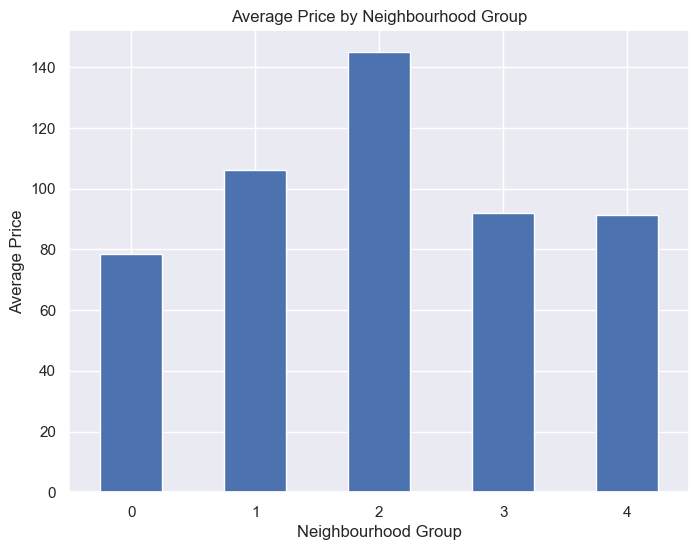

In [86]:
import matplotlib.pyplot as plt

# Calculating the means of 'price' by 'neighbourhood_group'
grouped_data = df.groupby('neighbourhood_group')['price'].mean()

plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.show()


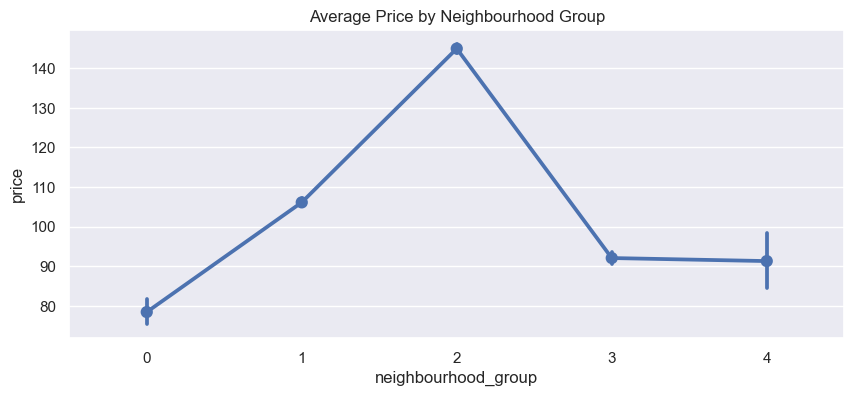

In [89]:
sns.pointplot(x = 'neighbourhood_group', y='price', data=df)
plt.title('Average Price by Neighbourhood Group')
plt.show()

**Distribution of room types across NYC**

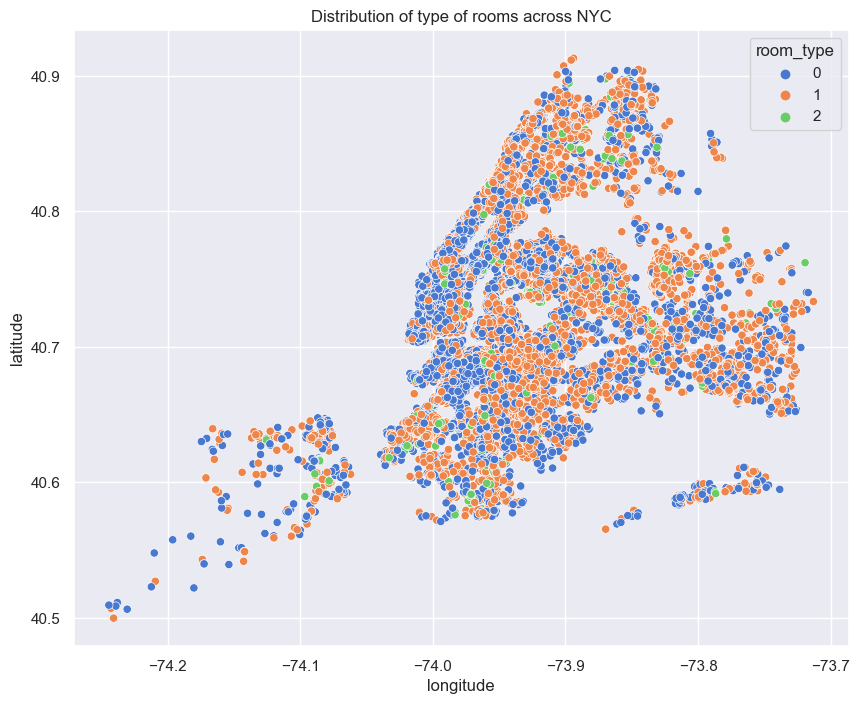

In [94]:
sns.set(rc={"figure.figsize": (10, 8)})
ax = sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')
plt.show()

Comment: We can observe that shared rooms are less throughout NYC compared to Private room or Entire rooms/Apt

**Analysis on room type and price**

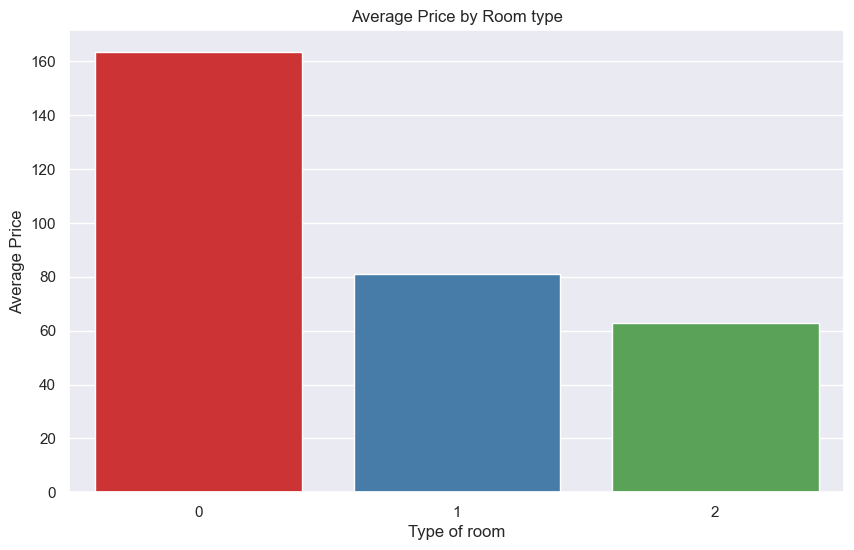

In [92]:
# Calculating the means of 'price' by 'room_type'
grouped_data = df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='room_type', y='price', palette='Set1')
plt.xlabel('Type of room')
plt.ylabel('Average Price')
plt.title('Average Price by Room type')
plt.xticks(rotation=0)
plt.show()


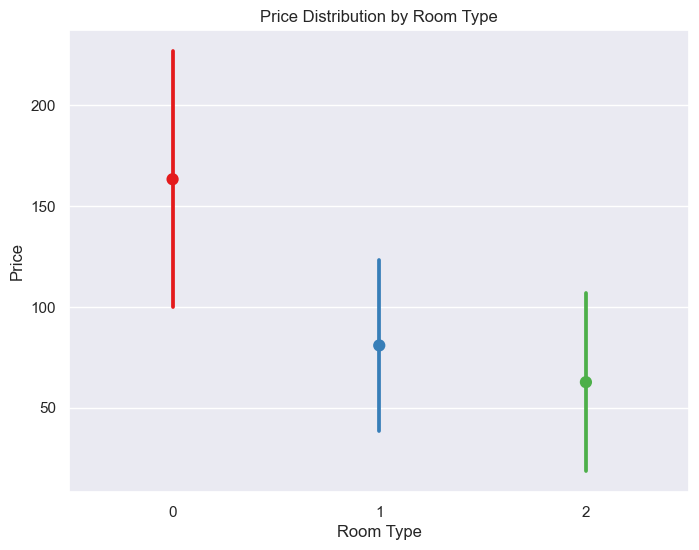

In [96]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='room_type', y='price', ci='sd', palette='Set1')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

**Top 10 costly and top 10 cheap listings**

In [97]:
# finding top 10 costly listings
df.nlargest(10,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
2158,1br apt featured new york mag,2,greenwich village,nick,0,334
13798,midcentury museum sleepover,1,williamsburg,cullen,0,333
19641,sommwhere nyc unique conscious artists loft,2,lower east side,fatima,1,333
38565,parisian palace heart manhattan,2,chelsea,aleszea,0,333
45303,fivestar luxury apt chelsea,2,chelsea,paola,0,333
48567,private duplex mansion heart nyc,2,west village,clinton,0,333
46439,chelsea central luxury 2baths,2,chelsea,danilo & larissa,0,332
1356,greenwich village skylit 1br deck,2,greenwich village,chris,0,331
1566,sunny large lovely greenpoint,1,greenpoint,isabelle,0,330
4152,spectacular williamsburg 2 br loft,1,williamsburg,thomas,0,330


Comment: It appears that the majority of listings are from Manhattan

In [98]:
# finding the top 10 cheapest listings
df.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:10]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
33505,room view,1,williamsburg,martin,1,10
35601,charming bright brand new bedstuy home,1,bedford-stuyvesant,caterina,0,10
24100,girls only cozy room one block times square,2,hell's kitchen,mario,2,10
22261,newly renovated fully furnished room brooklyn,1,bushwick,katie,1,10
21700,couch harlem harvey refugees,2,harlem,morgan,2,10
22287,jen apt,2,soho,jennifer,1,10
34446,bronx apart,0,highbridge,luz,1,10
22835,simply convenient,3,jamaica,maria,0,10
47218,beautiful room bushwick,1,bushwick,julio,1,10
35386,cozy room threebedroom house,3,woodhaven,arthur,1,10


Comment: It appears that the majority of listings are from Brooklyn

In [99]:
# finding costliest listings in each neighbourhood groups
costliest_df= df.loc[df.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

In [100]:
costliest_df.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
2158,1br apt featured new york mag,2,nick,334
13798,midcentury museum sleepover,1,cullen,333
10710,waterfront perfect nyc getaway,0,frank and anna,325
30667,2 bedroom apt newly renovated10 min times sq,3,kimberley,325
11373,staten island nyc marathon,4,elizabeth,300


**Host with highest listings**

In [101]:
host_listings= df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
count_df= host_listings.nlargest(5,'calculated_host_listings_count')

In [102]:
count_df

,host_name,neighbourhood_group,calculated_host_listings_count
10994,sonder (nyc),2,144.000000
5696,john,2,5.395706
8063,melissa,1,4.257669
4039,gabriel,2,2.585890
897,anting,1,2.061350


We can see that Sonder (NYC) has the highest number of listings, that too in 2 - Manhattan, the most costly area that we found.

**Analyzing Room type by Neighborhood group**

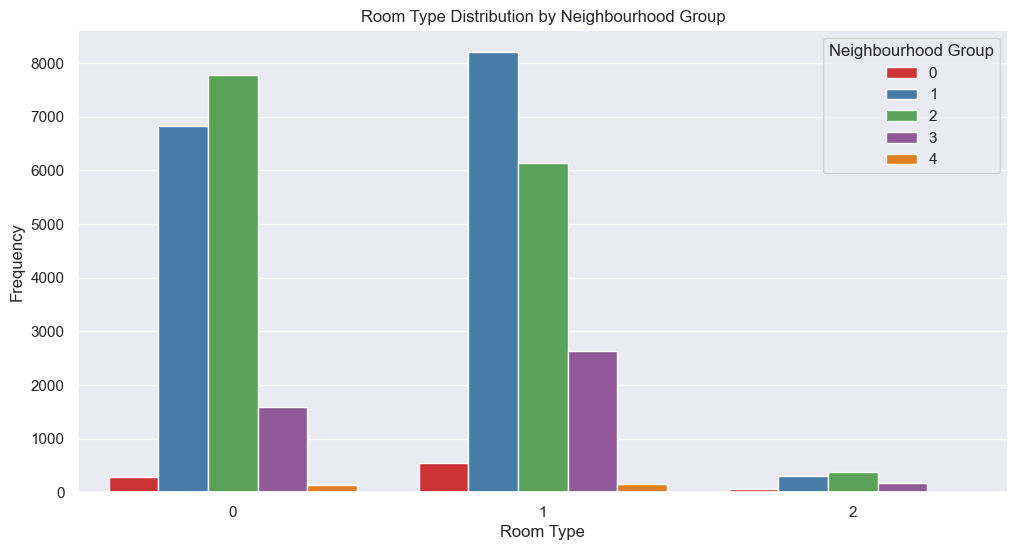

In [105]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='room_type', hue='neighbourhood_group', palette='Set1')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Room Type Distribution by Neighbourhood Group')
plt.xticks()
plt.legend(title='Neighbourhood Group')
plt.show()

**Room type vs Price ranges w.r.t Neighbourhood groups**

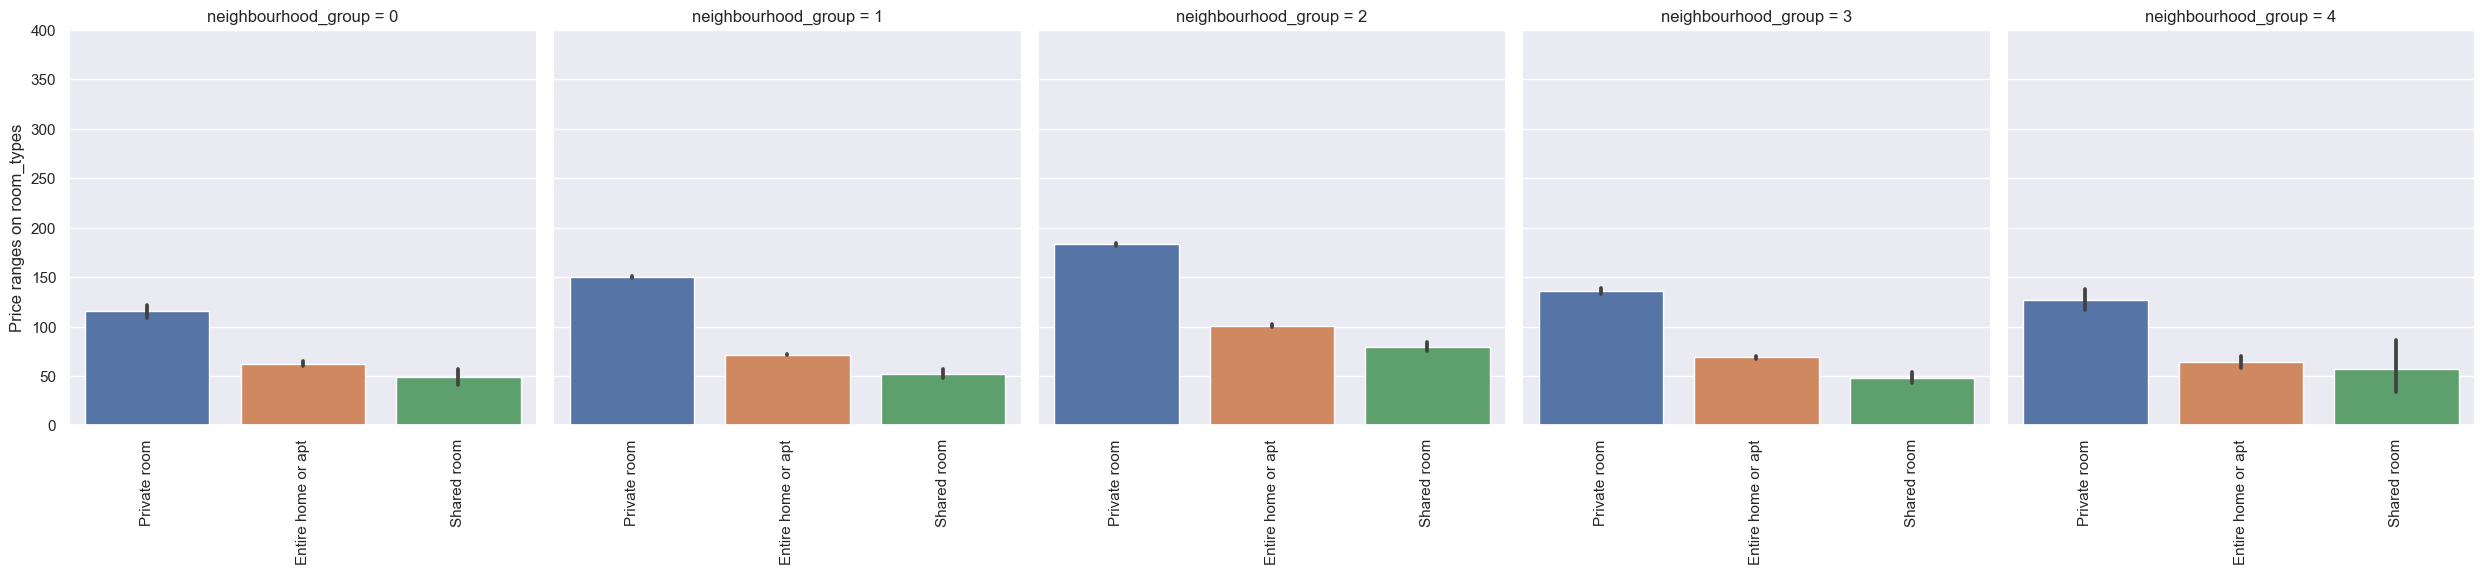

In [107]:
fig = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df, saturation=.8,
                kind="bar")
(fig.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home or apt", "Shared room"], rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 
plt.show()

**Minimum nights vs Price**

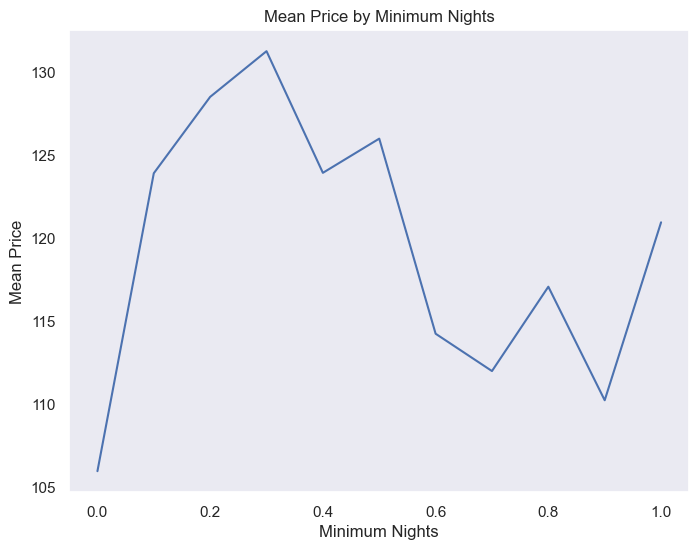

In [116]:
mean_price_by_nights = df.groupby('minimum_nights')['price'].mean()
plt.figure(figsize=(8, 6))
mean_price_by_nights.plot()
plt.title('Mean Price by Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Mean Price')
plt.grid()
plt.show()

**Comparison of reviews w.r.t Neighbourhood group:**

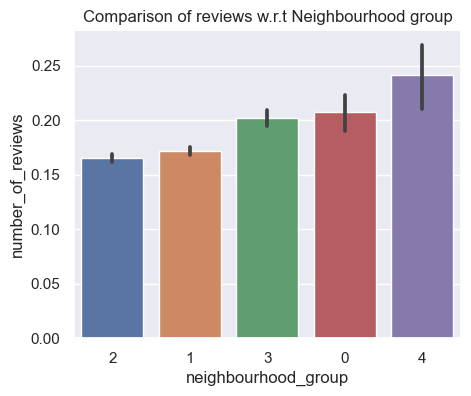

In [108]:
plt.figure(figsize=(5,4))
fig = df.groupby(['neighbourhood_group'])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='neighbourhood_group', y='number_of_reviews', data=df, order=fig['neighbourhood_group'])
plt.title('Comparison of reviews w.r.t Neighbourhood group')
plt.show()

**Mean Plot: Mean Price by Neighborhood group**

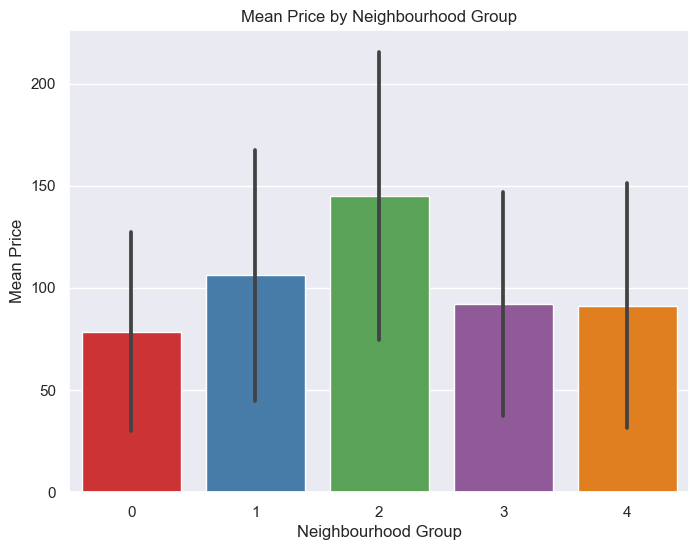

In [110]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='neighbourhood_group', y='price', ci='sd', palette='Set1')
plt.title('Mean Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price')
plt.xticks(rotation=0)
plt.show()

**Properties Availability Distribution**

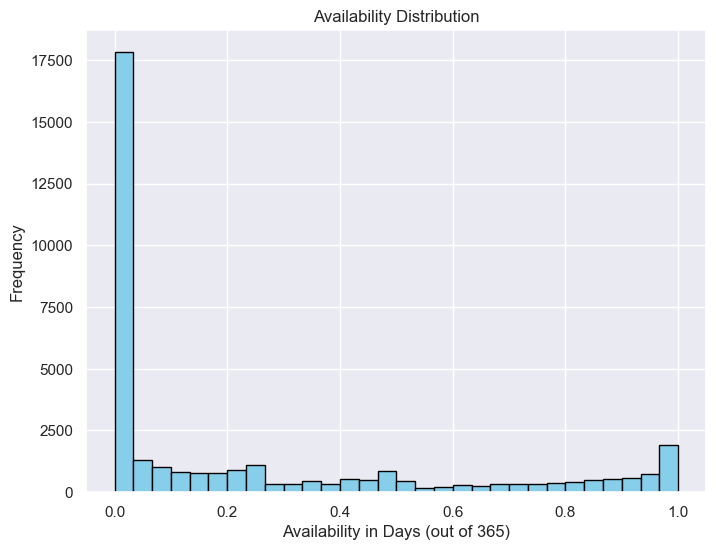

In [111]:
# Creating a histogram for availability_365
plt.figure(figsize=(8, 6))
plt.hist(df['availability_365'], bins=30, color='skyblue', edgecolor='black')
plt.title('Availability Distribution')
plt.xlabel('Availability in Days (out of 365)')
plt.ylabel('Frequency')
plt.show()


**Analysis of Manhattan Neighbourhood prices**

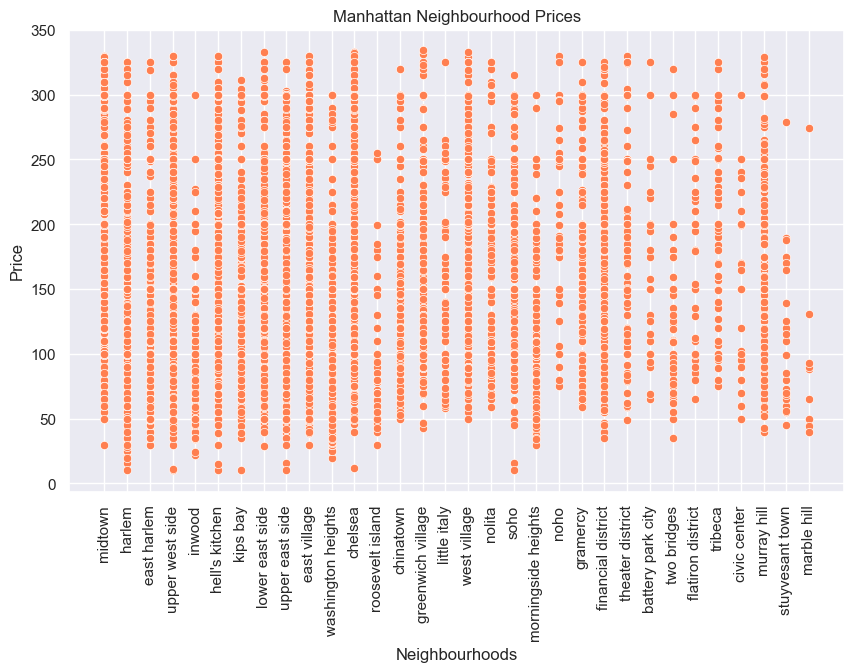

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['neighbourhood_group'] == 2], x='neighbourhood', y='price', color='coral')
plt.title('Manhattan Neighbourhood Prices')
plt.xlabel('Neighbourhoods')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''
References:
1. https://towardsdatascience.com/outlier-detection-methods-in-machine-learning-1c8b7cca6cb8#:~:text=IQR%20method&text=IQR%20stands%20for%20interquartile%20range,upper%20bound%20to%20identify%20outliers.&text=Any%20value%20below%20the%20lower,are%20considered%20to%20be%20outliers.
2. https://matplotlib.org/stable/index.html
3. https://seaborn.pydata.org/
4. https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm
'''